In [1]:
import warnings
warnings.filterwarnings("ignore")
from api import API

Using TensorFlow backend.


In [2]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {

      'Mean': {},"CO":{},'Hart85':{},"FHMM_EXACT":{},
      "RNN":{'n_epochs':50,'batch_size':1024},"Seq2Point":{'n_epochs':50,'batch_size':1024},
      "Seq2Seq":{'n_epochs':50,'batch_size':1024},"DAE":{'n_epochs':50,'batch_size':1024},"WindowGRU":{'n_epochs':30,'batch_size':1024},

  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport.hdf5',
				'buildings': {

				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport.hdf5',
			'buildings': {
                
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Started Prediction using:  Mean
Started Prediction using:  CO
...............CO disaggregate_chunk running.............
Started Prediction using:  Hart85ing machine''
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Started Prediction using:  FHMM
Started Prediction using:  RNN
Started Prediction using:  Seq2Point
Started Prediction using:  Seq2Seq
 test New mains shape
(8848, 99, 1)
Started Prediction using:  DAE
Started Prediction using:  WindowGRU
............  mae  ..............
                        Mean          CO      Hart85  FHMM_EXACT         RNN  \
fridge             48.931244   96.229042   33.587635   66.547173   33.509705   
air conditioner   217.217117  125.279793  187.621399   99.636711  105.112442   
electric furnace   70.432358   69.427116   80.879837   69.

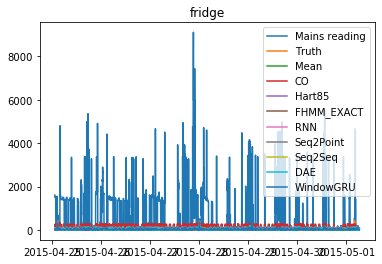

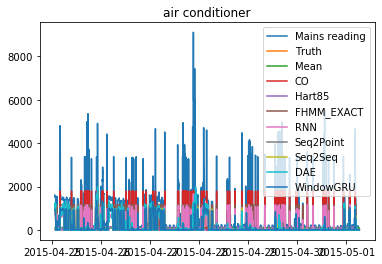

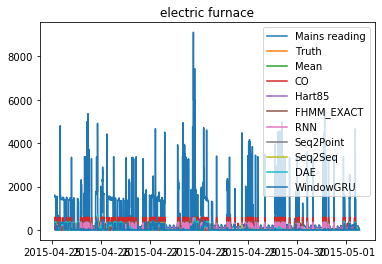

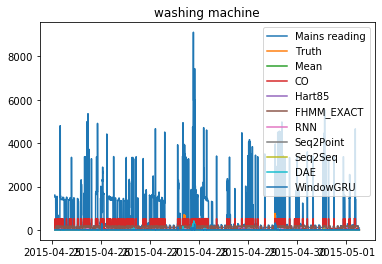

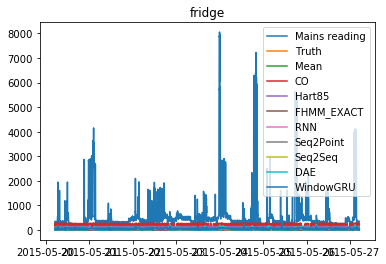

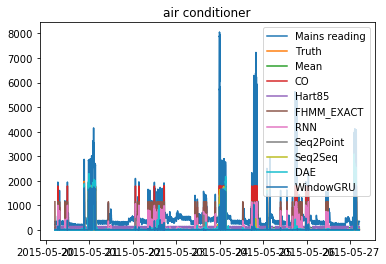

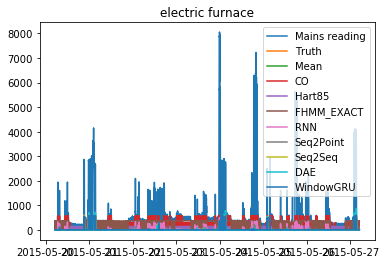

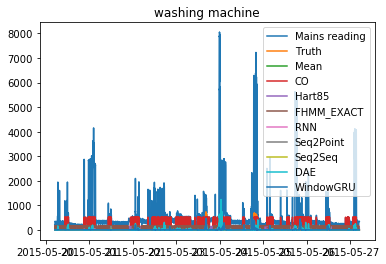

In [4]:

api_res = API(redd)


In [10]:
api_res.errors

[                        Mean          CO      Hart85  FHMM_EXACT         RNN  \
 fridge             48.931244   96.229042   33.587635   66.547173   33.509705   
 air conditioner   217.217117  125.279793  187.621399   99.636711  105.112442   
 electric furnace   70.432358   69.427116   80.879837   69.279121   31.840826   
 washing machine     7.248257   89.180084   50.256874   89.198524    7.691702   
 
                   Seq2Point    Seq2Seq        DAE  WindowGRU  
 fridge            18.026743  18.322031  26.213232  21.658562  
 air conditioner   21.065077  27.447470  44.759617  38.479740  
 electric furnace   8.918571   8.637813  14.347948  11.295187  
 washing machine    3.867561   3.601010   4.789813   5.967016  ,
                         Mean          CO      Hart85  FHMM_EXACT        RNN  \
 fridge             39.046425  112.971924   47.264484   46.267857  29.781374   
 air conditioner   135.736282   56.162895  124.460915   67.439781  54.233253   
 electric furnace   42.080956  1

In [11]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Standard Deviation")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean          CO      Hart85  FHMM_EXACT        RNN  \
fridge             43.988834  104.600483   40.426060   56.407515  31.645539   
air conditioner   176.476700   90.721344  156.041157   83.538246  79.672848   
electric furnace   56.256657  115.317974   84.345226  144.837673  26.357243   
washing machine    11.189517   96.825756   65.057304   92.654423  10.925844   

                  Seq2Point    Seq2Seq        DAE  WindowGRU  
fridge            15.197810  15.472712  22.056157  19.121888  
air conditioner   18.417265  22.416138  35.426641  26.848690  
electric furnace   7.720759   8.053575  11.949097   8.029951  
washing machine    7.431211   8.113668  12.805201  10.043226  



Standard Deviation
                       Mean         CO     Hart85  FHMM_EXACT        RNN  \
fridge             4.942410   8.371441   6.838425   10.139658   1.864165   
air conditioner   40.740417  34.558449  31.580242   16.098465  25.439594   
electric furnace  14.175701  45